In [150]:
import pandas as pd
import numpy as np

In [151]:
df = pd.read_csv("USA_cars_datasets.csv")

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [153]:
df.shape

(2499, 13)

In [154]:
df = df.iloc[:,1:]

In [155]:
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [156]:
import matplotlib.pyplot as plt

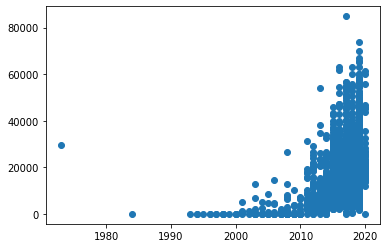

In [157]:
plt.scatter(df['year'],df['price'])

In [158]:
year = df.iloc[:,3:4]

In [159]:
price = df.iloc[:,0:1]

In [160]:
from sklearn.model_selection import train_test_split

year_train_set ,year_test_set,price_train_set,price_test_set = train_test_split(year,price,test_size=0.1)

In [161]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [162]:
# year_train_set = scaler.fit_transform(year_train_set)

In [163]:
# year_test_set = scaler.transform(year_test_set)

In [164]:
# price_train_set = scaler.fit_transform(price_train_set)

In [165]:
# price_test_set = scaler.transform(price_test_set)

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
regr = LinearRegression()

In [168]:
regr.fit(year_train_set,price_train_set)

LinearRegression()

In [169]:
price_predict = regr.predict(year_test_set)

In [170]:
price_predict.astype(int)

array([[ 15934],
       [ 17566],
       [ 14302],
       [ 22462],
       [ 20830],
       [ 20830],
       [ 22462],
       [ 17566],
       [ 22462],
       [ 22462],
       [ 22462],
       [ 22462],
       [ 22462],
       [ 11038],
       [  6142],
       [ 20830],
       [ 14302],
       [ 22462],
       [ 22462],
       [ 17566],
       [ 17566],
       [ 22462],
       [ 14302],
       [ 22462],
       [ 19198],
       [ 22462],
       [ 22462],
       [ 22462],
       [ 22462],
       [ 20830],
       [ 19198],
       [ 20830],
       [ 19198],
       [-15073],
       [ 22462],
       [ 22462],
       [ 20830],
       [ 17566],
       [ 11038],
       [ 17566],
       [ 15934],
       [ 22462],
       [ 17566],
       [ 19198],
       [ 22462],
       [ 19198],
       [ 19198],
       [ 20830],
       [ 11038],
       [ 22462],
       [ 12670],
       [ 17566],
       [ 20830],
       [ 11038],
       [ 20830],
       [ 22462],
       [ 22462],
       [ -3649],
       [ 22462

In [171]:
price_test_set = price_test_set.to_numpy()


In [172]:
price_test_set

array([[16593],
       [22400],
       [ 6700],
       [24300],
       [32500],
       [17000],
       [14810],
       [ 6200],
       [10910],
       [28300],
       [22700],
       [ 4000],
       [21900],
       [ 4100],
       [    0],
       [15200],
       [ 7500],
       [46800],
       [24000],
       [36000],
       [26500],
       [17100],
       [ 3000],
       [ 7300],
       [ 5250],
       [21800],
       [34000],
       [15600],
       [29000],
       [26550],
       [31800],
       [22800],
       [20500],
       [    0],
       [25900],
       [28500],
       [14400],
       [ 7300],
       [ 6700],
       [10700],
       [ 7500],
       [41200],
       [11000],
       [12700],
       [24000],
       [12520],
       [13200],
       [28999],
       [ 2000],
       [18500],
       [23500],
       [24000],
       [15000],
       [  100],
       [15700],
       [23400],
       [17000],
       [ 2000],
       [23400],
       [20500],
       [ 2800],
       [ 1500],
       [

In [173]:
regr.coef_

array([[1631.96496188]])

In [174]:
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
print("Mean squared error: %.2f" % mean_squared_error(price_test_set, price_predict))

Mean squared error: 150250354.90


In [176]:
print("Coefficient of determination: %.2f" % r2_score(price_test_set, price_predict))

Coefficient of determination: 0.02


In [ ]:
# /Poor model


In [195]:
import pickle

pickle.dump(regr,open('model.pkl','wb'))